### Loading Required Libraries

In [1]:
#Data preprocessing:
import pandas as pd
import numpy as np
#Visualisations:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
#test for stationarity:
from statsmodels.tsa.stattools import adfuller
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
#ARIMA model:
from statsmodels.tsa.arima_model import ARIMA

/Users/admin/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Train dataset

In [2]:
#uploading train dataset
train = pd.read_csv("train_aWnotuB.csv",parse_dates=[0],index_col="DateTime")

In [3]:
#first few rows of train
train.head()

,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041


In [4]:
#dimensions of train dataset
train.shape

(48120, 3)

In [5]:
#train dataset datatypes
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48120 entries, 2015-11-01 00:00:00 to 2017-06-30 23:00:00
Data columns (total 3 columns):
Junction    48120 non-null int64
Vehicles    48120 non-null int64
ID          48120 non-null int64
dtypes: int64(3)
memory usage: 1.5 MB


In [6]:
#summary statistics of train dataset
train.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [7]:
#changing the data type of "Vehicles" column from integer to float as required for further calculations
train.Vehicles = train.Vehicles.astype("float64")

### Dividing train dataset into four seperate dataframes based on four types of "Junction"

In [8]:
train1 = train[train["Junction"] == 1]
train1_df = train1[["Vehicles"]]

In [9]:
train2 = train[train["Junction"] == 2]
train2_df = train2[["Vehicles"]]

In [10]:
train3 = train[train["Junction"] == 3]
train3_df = train3[["Vehicles"]]

In [11]:
train4 = train[train["Junction"] == 4]
train4_df = train4[["Vehicles"]]

In [12]:
#checking the dimensions of the dataset created
[train1_df.shape,train2_df.shape,train3_df.shape,train4_df.shape]

[(14592, 1), (14592, 1), (14592, 1), (4344, 1)]

# Test dataset

In [13]:
#uploading test dataset
test = pd.read_csv("test_BdBKkAj.csv",parse_dates=[0],index_col="DateTime")

In [14]:
#first few rows of test dataset
test.head()

,Junction,ID
DateTime,,
2017-07-01 00:00:00,1,20170701001
2017-07-01 01:00:00,1,20170701011
2017-07-01 02:00:00,1,20170701021
2017-07-01 03:00:00,1,20170701031
2017-07-01 04:00:00,1,20170701041


In [15]:
#dimensions of test dataset
test.shape

(11808, 2)

In [16]:
#test dataset datatypes
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11808 entries, 2017-07-01 00:00:00 to 2017-10-31 23:00:00
Data columns (total 2 columns):
Junction    11808 non-null int64
ID          11808 non-null int64
dtypes: int64(2)
memory usage: 276.8 KB


### Dividing test dataset into four seperate dataframes based on four types of "Junction"

In [17]:
test1 = test[test["Junction"] == 1]
test1_df = test1.drop(["Junction","ID"],axis=1)

In [18]:
test2 = test[test["Junction"] == 2]
test2_df = test2.drop(["Junction","ID"],axis=1)

In [19]:
test3 = test[test["Junction"] == 3]
test3_df = test3.drop(["Junction","ID"],axis=1)

In [20]:
test4 = test[test["Junction"] == 4]
test4_df = test4.drop(["Junction","ID"],axis=1)

In [21]:
#checking the dimensions of the dataset created
[test1_df.shape,test2_df.shape,test3_df.shape,test4_df.shape]

[(2952, 0), (2952, 0), (2952, 0), (2952, 0)]

# Working with the first train dataframe (train1_df) where "junction" = 1

### Plotting the train1 dataframe

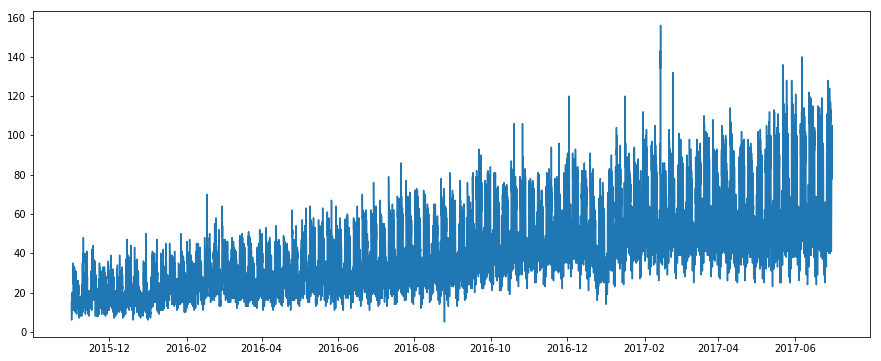

In [22]:
plt.plot(train1_df)

### Creating a function to test the stationarity of the data

In [23]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.iloc[:,0].values, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

/Users/admin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
/Users/admin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  """


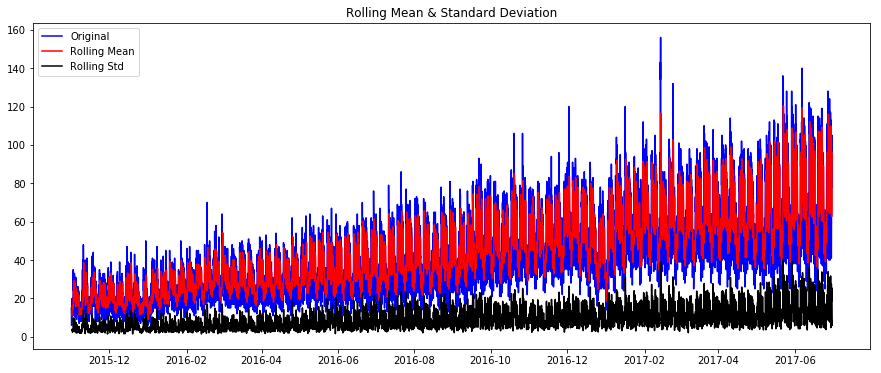

Results of Dickey-Fuller Test:
Test Statistic                -7.148078e+00
p-value                        3.193843e-10
#Lags Used                     4.200000e+01
Number of Observations Used    1.454900e+04
Critical Value (1%)           -3.430800e+00
Critical Value (5%)           -2.861739e+00
Critical Value (10%)          -2.566876e+00
dtype: float64


In [24]:
test_stationarity(train1_df)

In [25]:
float('-7.148078e+00') < float ('-3.430800e+00')

True

Since the value of Test Statistic is less than Critical Value at 1% therefore, we can say with 99% confidence that this series is stationery

## ACF & PACF for order of ARIMA model

In [26]:
#creating diffs by 1 period
ts_diff1 = train1_df - train1_df.shift()
ts_diff1.dropna(inplace=True)

In [27]:
lag_acf1 = acf(ts_diff1, nlags=24)
lag_pacf1 = pacf(ts_diff1, nlags=24, method='ols')

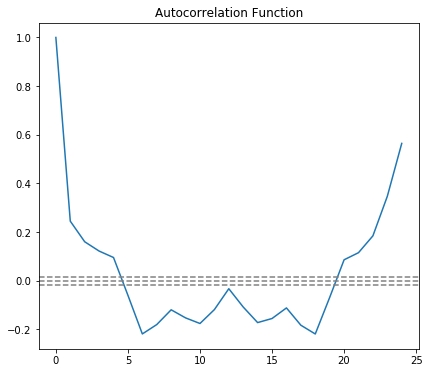

In [28]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf1)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff1)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff1)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

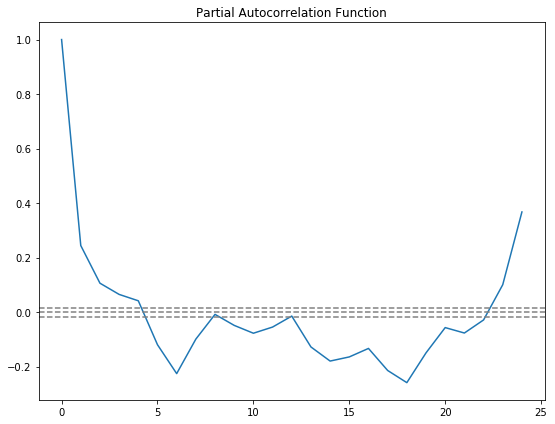

In [29]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf1)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff1)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff1)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

## ARIMA model for out of sample prediction (multiple step)

In [30]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [31]:
# seasonal difference
X = train1_df.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)

# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=2952)[0]
# invert the differenced forecast to something usable
history = [x for x in X]
result1 = []
step = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    history.append(inverted)
    result1.append(inverted[0])
    step += 1

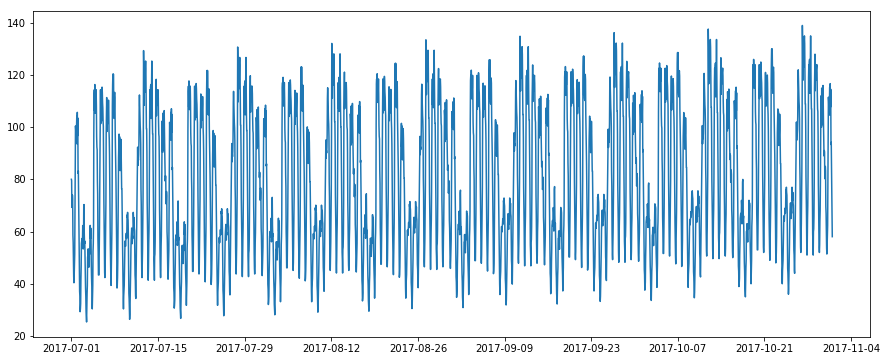

In [32]:
test1_df["Vehicles"] = result1
plt.plot(test1_df)

In [33]:
sol1 = pd.DataFrame(test1.ID)
sol1.reset_index(drop=True,inplace=True)
sol1["Vehicles"] = result1
sol1.head()

,ID,Vehicles
0,20170701001,80.050723
1,20170701011,79.539820
2,20170701021,69.282646
3,20170701031,69.636436
4,20170701041,73.987783


# Working with the second train dataframe (train2_df) where "junction" = 2

### Plotting the train2 dataframe

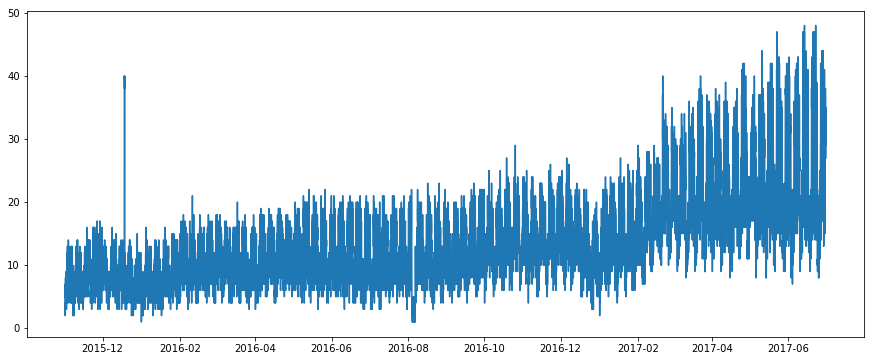

In [34]:
plt.plot(train2_df)    

### Creating a function to test the stationarity of the data

/Users/admin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
/Users/admin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  """


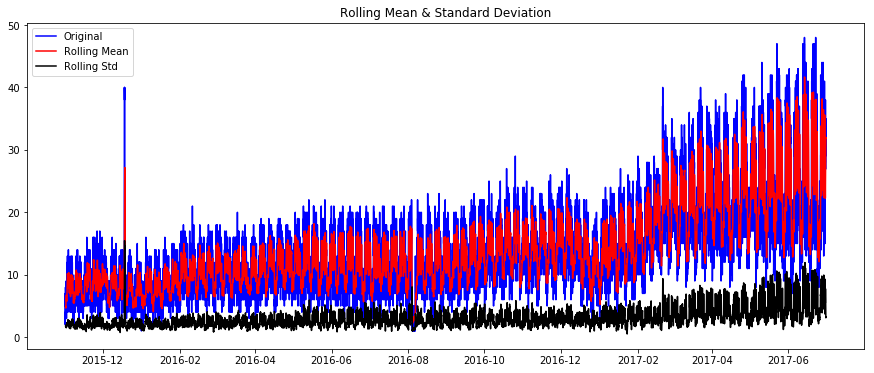

Results of Dickey-Fuller Test:
Test Statistic                -8.041077e+00
p-value                        1.846368e-12
#Lags Used                     4.200000e+01
Number of Observations Used    1.454900e+04
Critical Value (1%)           -3.430800e+00
Critical Value (5%)           -2.861739e+00
Critical Value (10%)          -2.566876e+00
dtype: float64


In [35]:
test_stationarity(train2_df)

In [36]:
float('-8.041077e+00') < float ('-3.430800e+00')

True

Since the value of Test Statistic is less than Critical Value at 1% therefore, we can say with 99% confidence that this series is stationery

## ACF & PACF for order of ARIMA model

In [37]:
#creating diffs by 1 period
ts_diff2 = train2_df - train2_df.shift()
ts_diff2.dropna(inplace=True)

In [38]:
lag_acf2 = acf(ts_diff2, nlags=24)
lag_pacf2 = pacf(ts_diff2, nlags=24, method='ols')

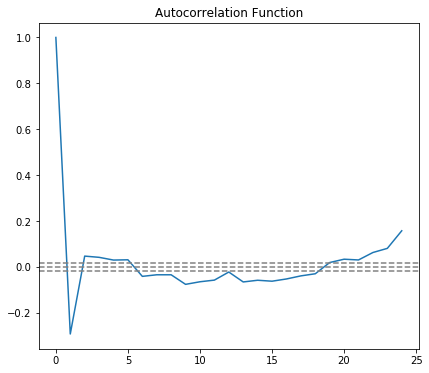

In [39]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf2)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff2)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff2)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

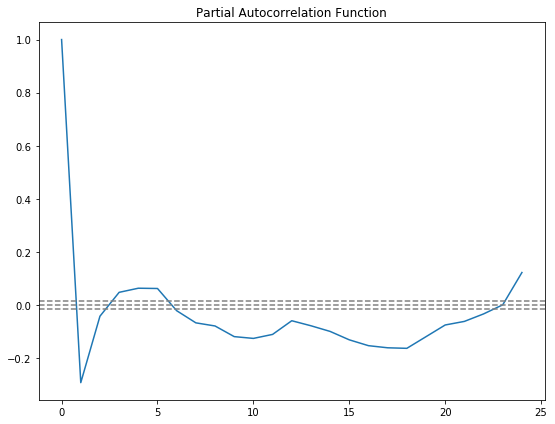

In [40]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf2)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff2)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff2)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

## ARIMA model for out of sample prediction (multiple step)

In [41]:
# seasonal difference
X = train2_df.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)

# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=2952)[0]
# invert the differenced forecast to something usable
history = [x for x in X]
result2 = []
step = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    history.append(inverted)
    result2.append(inverted[0])
    step += 1

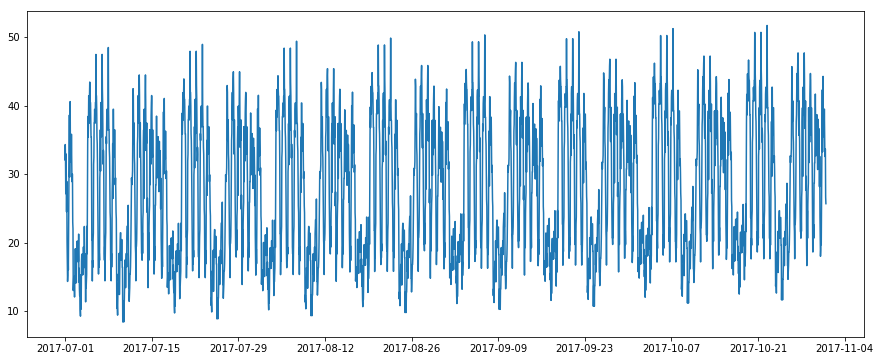

In [42]:
test2_df["Vehicles"] = result2
plt.plot(test2_df)

In [43]:
sol2 = pd.DataFrame(test2.ID)
sol2.reset_index(drop=True,inplace=True)
sol2["Vehicles"] = result2
sol2.head()

,ID,Vehicles
0,20170701002,32.084016
1,20170701012,34.316345
2,20170701022,32.231774
3,20170701032,27.148072
4,20170701042,32.944034


# Working with the third train dataframe (train3_df) where "junction" = 3

### Plotting the train3 dataframe

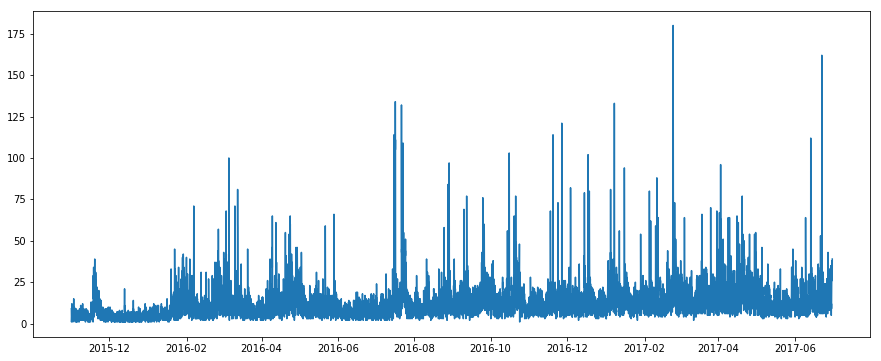

In [44]:
plt.plot(train3_df)    

### Creating a function to test the stationarity of the data

/Users/admin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
/Users/admin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  """


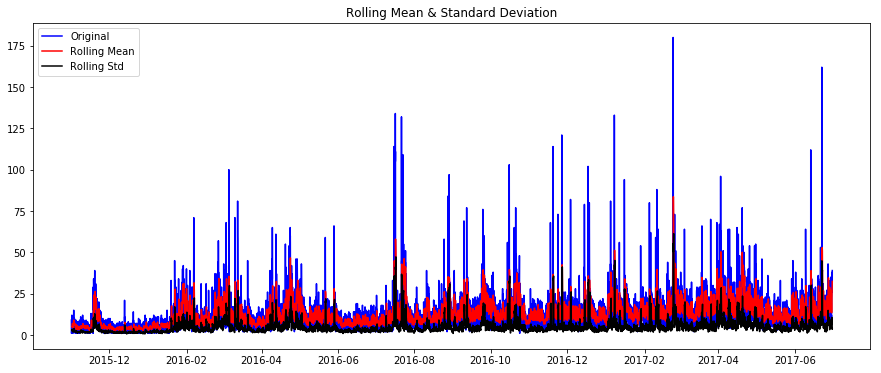

Results of Dickey-Fuller Test:
Test Statistic                -8.236600e+00
p-value                        5.867296e-13
#Lags Used                     4.200000e+01
Number of Observations Used    1.454900e+04
Critical Value (1%)           -3.430800e+00
Critical Value (5%)           -2.861739e+00
Critical Value (10%)          -2.566876e+00
dtype: float64


In [45]:
test_stationarity(train3_df)

In [46]:
float('-8.236600e+00') < float ('-3.430800e+00')

True

Since the value of Test Statistic is less than Critical Value at 1% therefore, we can say with 99% confidence that this series is stationery

## ACF & PACF for order of ARIMA model

In [47]:
#creating diffs by 1 period
ts_diff3 = train3_df - train3_df.shift()
ts_diff3.dropna(inplace=True)

In [48]:
lag_acf3 = acf(ts_diff3, nlags=24)
lag_pacf3 = pacf(ts_diff3, nlags=24, method='ols')

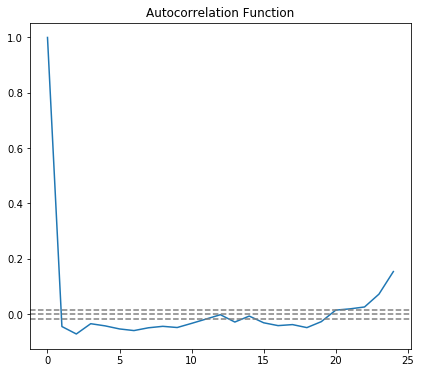

In [49]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf3)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff3)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff3)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

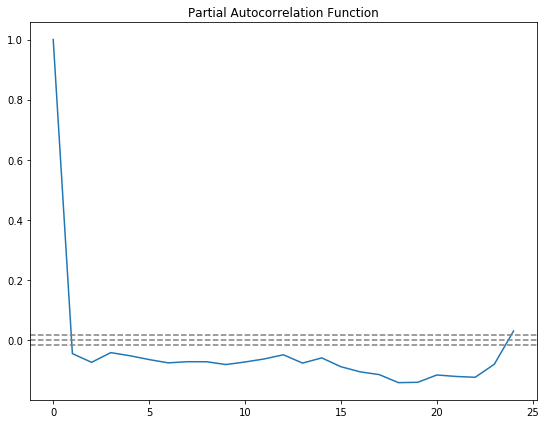

In [ ]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf3)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff3)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff3)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

## ARIMA model for out of sample prediction (multiple step)

In [ ]:
# seasonal difference
X = train3_df.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)

# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=2952)[0]
# invert the differenced forecast to something usable
history = [x for x in X]
result3 = []
step = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    history.append(inverted)
    result3.append(inverted[0])
    step += 1

In [ ]:
test3_df["Vehicles"] = result3
plt.plot(test3_df)

In [ ]:
sol3 = pd.DataFrame(test3.ID)
sol3.reset_index(drop=True,inplace=True)
sol3["Vehicles"] = result3
sol3.head()

# Working with the fourth train dataframe (train4_df) where "junction" = 4

### Plotting the train4 dataframe

In [ ]:
plt.plot(train4_df)    

### Creating a function to test the stationarity of the data

In [ ]:
test_stationarity(train4_df)

In [ ]:
float('-6.726732e+00') < float ('-3.430800e+00')

Since the value of Test Statistic is less than Critical Value at 1% therefore, we can say with 99% confidence that this series is stationery

## ACF & PACF for order of ARIMA model

In [ ]:
#creating diffs by 1 period
ts_diff4 = train4_df - train4_df.shift()
ts_diff4.dropna(inplace=True)

In [ ]:
lag_acf4 = acf(ts_diff4, nlags=24)
lag_pacf4 = pacf(ts_diff4, nlags=24, method='ols')

In [ ]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf4)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff4)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff4)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

In [ ]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf4)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff4)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff4)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

## ARIMA model for out of sample prediction (multiple step)

In [ ]:
# seasonal difference
X = train4_df.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)

# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=2952)[0]
# invert the differenced forecast to something usable
history = [x for x in X]
result4 = []
step = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    history.append(inverted)
    result4.append(inverted[0])
    step += 1

In [ ]:
test4_df["Vehicles"] = result4
plt.plot(test4_df)

In [ ]:
sol4 = pd.DataFrame(test4.ID)
sol4.reset_index(drop=True,inplace=True)
sol4["Vehicles"] = result4
sol4.head()

# Creating the solution dataframe by joining four different dataframes obtained

In [ ]:
solution = pd.concat([sol1,sol2,sol3,sol4])

In [ ]:
solution.head()

In [ ]:
#rounding the values of "Vehicles" to get integer values
solution.Vehicles = solution.Vehicles.round()

In [ ]:
#exporting a csv file with solution
solution.to_csv(path_or_buf="solution.csv",index=False)